类与面向对象编程
========

BUSS1301 程序设计，2023年春季

Contents
===
* 1. 面向对象编程
* 2. 对象、类和实例
* 3. 创建类和使用类：实例属性和方法
* 4. 创建类和使用类：类属性和方法
* 5. 创建类和使用类：从外部导入类
* 6. 高阶篇：重载
* 7. 高阶篇：继承
* 8. 高阶篇：实例作为属性
* 9. 课堂&课后练习

-------


### 1. 面向对象编程
* 例子引入
> 用字典保存学生的名字和成绩，编写两个函数，可以修改学生的成绩和打印学生的成绩
<br/> 完成以下任务：
> * 学生Michael的成绩为98，学生Bob的成绩为81
> * 将这两学生的成绩分别改成97和80
> * 打印这两学生成绩

In [1]:
# 使用函数
std1 = { 'name': 'Michael', 'score': 98 }
std2 = { 'name': 'Bob', 'score': 81 }

def set_score(std, score):
    std['score'] = score

def print_score(std):
    print('%s: %s' % (std['name'], std['score']))

set_score(std1, 97)
set_score(std2, 80)
print_score(std1)
print_score(std2)

Michael: 97
Bob: 80


思考：为了便于代码交流，我们希望怎么样？

In [16]:
class Student():
    def __init__(self, name, score):
        self.name = name
        self.score = score
    def set_score(self, score):
        self.score = score
    def print_score(self):
        print('%s: %s'%(self.name,self.score))

# 我们希望的代码：
std1 = Student('Michael', 98)
std2 = Student('Bob', 81)

std1.set_score(97)
std2.set_score(80)

std1.print_score()
std2.print_score()

Michael: 97
Bob: 80


如果所有写好的工具都是这样…写代码好简单！

> 例子一：画图

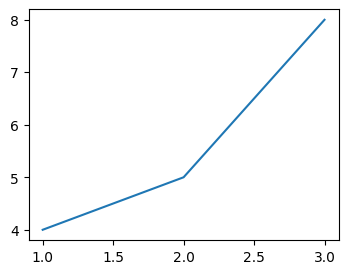

In [13]:
# 需要先安装第三方库：pip install matplotlib
from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(4,3)) # 新建一个figure
ax = fig.add_subplot(111) # 添加一个子图
ax.plot([1,2,3], [4,5,8]) # 绘制图像

> 例子二：爬虫

In [14]:
# 需要先安装第三方库：pip install requests
import requests
sess = requests.session()
sess.headers.update({'User-Agent':'Mozilla/5.0'})
response = sess.get('http://www.net.cn/static/customercare/yourip.asp') 
text = response.text

import re # 暂时不用关心正则表达式怎么使用
print(re.search(r'\d+\.\d+\.\d+\.\d+', text).group(0))

202.120.24.199


### 2. 对象、类和实例

可以用type查看对象的类

可以用isinstance查看对象是否是类的实例


In [17]:
print(1, type(std1))
print(2, isinstance(std1, Student))

print(3, type(12))
print(4, isinstance(12, int))

print(5, type('shanghai'))
print(6, isinstance('shanghai', str))

print(7, isinstance('shanghai', Student))

1 <class '__main__.Student'>
2 True
3 <class 'int'>
4 True
5 <class 'str'>
6 True
7 False


### 3. 创建类和使用类：实例属性和方法

* 最简单情况

In [1]:
class Student():
    '''
    class for student info
    '''
    pass
    
std1 = Student()
std1.name = 'Michael'
std1.score = 98
print(std1.name)
print(std1.__doc__)


Michael

    class for student info
    


* 类的模板作用：构造函数初始化

In [173]:
class Student():
    '''
    class for student info
    '''
    def __init__(self, name, score): # 构造函数
        self.name = name             # 实例属性
        self.score = score           # 实例属性
    
std1 = Student('Michael', 98)
print(std1.name)

Michael


* 类的模板作用：实例方法

In [8]:
class Student():
    def __init__(self, name, score): # 构造函数
        self.name = name             # 实例属性
        self.score = score           # 实例属性

    def set_city(self, city):        # 实例方法
        self.city = city             # 实例属性
    
    def print_score(self, include_name = 0): # 实例方法
        if include_name:
            print('%s %d'%(self.name,self.score))
        else:
            print('%d'%(self.score))
    
std1 = Student('Michael', 98)
# 方式一：通过实例调用实例方法，无需传实例
std1.print_score(include_name=1)
# 方式二：通过类名调用实例方法，需要传实例作为self
Student.print_score(std1, include_name=0)

std1.set_city('Shanghai')
print(std1.city)


Michael 98
98
Shanghai


Michael: 98


* 类的封装作用

In [10]:
class Student():
    def __init__(self, name, score): # 构造函数
        self.name = name             # 实例属性
        self.score = score           # 实例属性
         
    def set_city(self, city):        # 实例方法
        self.city = city             # 实例属性
    
    def print_score(self):           # 实例方法
        print('%s: %s'%(self.name,self.score))
        
    def get_grade(self):             # 实例方法
        if self.score >= 90:
            return 'A'
        elif self.score >= 60:
            return 'B'
        else:
            return 'C'        

std1 = Student('Michael', 98)
std1.print_score()
print(std1.get_grade())

Michael: 98
A


* 例子1：Restaurant

In [13]:
# solution 1
class Restaurant():
    def __init__(self, name, status, city='Shanghai'):
        self.name = name
        self.status = status
        self.city = city
    def describe(self):
        status_str = 'Open' if self.status else 'Closed'
        print('%s: %s, %s'%(self.name, status_str, self.city))
    def describe_status(self):
        status_str = 'Open' if self.status else 'Closed'
        print('The status of the restaurant:', status_str)
    
res = Restaurant('Jun Dynasty', True)
print(res.name)
print(res.status)
print(res.city)
res.describe()
res.describe_status()

Jun Dynasty
True
Shanghai
Jun Dynasty: Open, Shanghai
The status of the restaurant: Open


思考：怎么避免describe和describe_status中重复的行？

In [16]:
# solution 2（错误用法）: 在describe函数里把status_str 改成 self.status_str
class Restaurant():
    def __init__(self, name, status, city='Shanghai'):
        self.name = name
        self.status = status
        self.city = city
    def describe(self):
        self.status_str = 'Open' if self.status else 'Closed'
        print('%s: %s, %s'%(self.name, self.status_str, self.city))
    def describe_status(self):
        print('The status of the restaurant:', self.status_str)
    
res = Restaurant('Jun Dynasty', True)
print(res.name)
print(res.status)
print(res.city)
#res.describe() # 这行没有调用的时候，会报错
res.describe_status()


Jun Dynasty
True
Shanghai


AttributeError: 'Restaurant' object has no attribute 'status_str'

思考：这样做有问题吗？

describe()实例方法不一定会被调用, self.status_str不一定存在

> 只有`__init__`函数是一定会被调用的

In [20]:
# solution 3： 将status_str放在一定会被调用的__init__函数
class Restaurant():
    def __init__(self, name, status, city='Shanghai'):
        self.name = name
        self.status = status
        self.city = city
        self.status_str = 'Open' if self.status else 'Closed'
    def describe(self):
        print('%s: %s, %s'%(self.name, self.status_str, self.city))
    def describe_status(self):
        print('The status of the restaurant:', self.status_str)
    
res = Restaurant('Jun Dynasty', True)
print(res.name)
print(res.status)
print(res.city)
res.describe()
res.describe_status()

Jun Dynasty
True
Shanghai
Jun Dynasty: Open, Shanghai
The status of the restaurant: Open


* 随堂练习1：平面直角坐标系的点

In [ ]:
class Coordinate():
    def __init__(self, x, y):
        pass
    def print(self):
        pass
    def distance(self, other):
        pass

p1 = Coordinate(3, 4)
p2 = Coordinate(1, 2)
p1.print()
p2.print()
# 计算p1和p2的距离
# 方法一：通过实例调用

# 方法二：通过类名调用



In [21]:
class Coordinate():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def print(self):
        print('(%d, %d)'%(self.x, self.y))
    def distance(self, other):
        x_diff_sq = (self.x - other.x) ** 2
        y_diff_sq = (self.y - other.y) ** 2
        return (x_diff_sq + y_diff_sq) ** 0.5

p1 = Coordinate(3, 4)
p2 = Coordinate(1, 2)
p1.print()
p2.print()
# 方法一：通过实例调用
print('Distance:', p1.distance(p2))
# 方法二：通过类名调用
print('Distance:', Coordinate.distance(p1, p2))


(3, 4)
(1, 2)
Distance: 2.8284271247461903
Distance: 2.8284271247461903


### 4. 创建类和使用类：类属性和方法

* 例子：在Student类记录学生数

In [12]:
class Student():
    number_count = 0 # 类属性
    def __init__(self, name, score): # 构造函数
        self.name = name             # 实例属性
        self.score = score           # 实例属性
        Student.number_count += 1
    
    def print_score(self):           # 实例方法
        print('%s: %s'%(self.name,self.score))
        
    
std1 = Student('Michael', 98)
print('Number of Students:', Student.number_count)

std2 = Student('Bob', 81)
print('Number of Students:', Student.number_count)

print('Number of Students:', std1.number_count)

Number of Students: 1
Number of Students: 2
Number of Students: 2


* 类属性和实例属性重名的时候…

In [103]:
class Student():
    name = 'Student'

s = Student()
print(1, s.name)

s.name = 'Michael'
print(2, s.name)

del s.name # 删除s实例的name
print(3, s.name)

1 Student
2 Michael
2 Student


### 5. 创建类和使用类：从外部导入类

In [11]:
# 注意： 
# Jupyter Notebook环境可能需要先执行这一行（依版本而异）
# %run utilities.py

from student import Student

std1 = Student('Michael', 98)
print(Student.number_count)

std2 = Student('Bob', 81)
print(Student.number_count)

19
20


### 6. 高阶篇：重载

In [14]:
class Coordinate():
    def __init__(self, x, y):
        self.x = x
        self.y = y

p1 = Coordinate(1, 2)
p2 = Coordinate(1, 2)
print(p1 == p2)
print(p1) 
# print(p1 + p2) # error
# p1 > p2 # error


False


TypeError: '>' not supported between instances of 'Coordinate' and 'Coordinate'

In [22]:
class Coordinate():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __str__(self): # overwrite print
        return '(%d, %d)'%(self.x, self.y)
    def __eq__(self, other): # overwrite ==
        return self.x == other.x and self.y == other.y
    def __add__(self, other): # overwrite +
        return Coordinate(self.x+other.x, self.y+other.y)
    def __gt__(self, other): # overwrite > (greater than)
        return self.x > other.x and self.y > other.y
    def __getitem__(self, key): # overwrite []
        if key == 1:
            return self.x
        elif key == 2:
            return self.y
        else:
            return None

p1 = Coordinate(1, 2)
p2 = Coordinate(1, 2)
p3 = Coordinate(2, 4)
print(p1 == p2)
print(p1)
print(p1 + p3)
print(p3 > p1)

print(p3[1], p3[2], p3[5])

True
(1, 2)
(3, 6)
True
2 4 None


* 课堂练习：Complex类

In [22]:
class Complex():
    def __init__(self, r, i):
        pass
    def __str__(self):
        pass
    def __add__(self, other):
        pass
    def __sub__(self, other):
        pass
    def __mul__(self, other):
        pass
c1 = Complex(2,3)
c2 = Complex(1,2)
print(c1)
print(c1 + c2)
print(c1 - c2)
print(c1*c2)

TypeError: __str__ returned non-string (type NoneType)

In [23]:
class Complex():
    def __init__(self, r, i):
        self.r = r
        self.i = i
    def __str__(self):
        return '(%d,%d)'%(self.r, self.i)
    def __add__(self, other):
        return Complex(self.r+other.r, self.i+other.i)
    def __sub__(self, other):
        return Complex(self.r-other.r, self.i-other.i)
    def __mul__(self, other): # (a+b i)*(c+d i)
        new_real = self.r*other.r - self.i*other.i
        new_imaginary = self.r*other.i + self.i*other.r
        return Complex(new_real, new_imaginary)
c1 = Complex(2,3)
c2 = Complex(1,2)
print(c1)
print(c1 + c2)
print(c1 - c2)
print(c1*c2)

(2,3)
(3,5)
(1,1)
(-4,7)


### 7. 高阶篇：继承

In [149]:
class Car():
    def __init__(self, manufacturer, model, year):
        self.mft = manufacturer
        self.model = model
        self.year = year
    def describe_car(self):
        print('Car: %s, %s, %s'%(self.mft, self.model, self.year))
    def refill(self):
        print('Filling the gas tank...')

class ElectricCar(Car):
    def __init__(self, make, model, year, battery_size):
        super().__init__(make, model, year)
        self.bs = battery_size # 特有属性
    def describle_battery(self): # 特有方法
        print("This car has a " + str(self.bs) + "-kwh battery.")
    def refill(self): # 重写refill
        print('The car is charging...')
    
car1 = Car('Audi', 'A4', 2019)
car1.describe_car()
car1.refill()
print('--------')
car2 = ElectricCar('Tesla', 'Model S', 2020, 120)
car2.describe_car()
car2.describle_battery()
car2.refill()
# car1.describle_battery() # error

Car: Audi, A4, 2019
Filling the gas tank...
--------
Car: Tesla, Model S, 2020
This car has a 120-kwh battery.
The car is charging...


* 课堂练习：冰淇淋小店

In [26]:
# solution 3： 将status_str放在一定会被调用的__init__函数
class Restaurant():
    def __init__(self, name, status, city='Shanghai'):
        self.name = name
        self.status = status
        self.city = city
        self.status_str = 'Open' if self.status else 'Closed'
    def describe(self):
        print('%s: %s, %s'%(self.name, self.status_str, self.city))
    def describe_status(self):
        print('The status of the restaurant:', self.status_str)

class IceCreamStand(Restaurant):
    def __init__(self, name, status, flavors, city='Shanghai'):
        super().__init__(name, status, city=city)
        self.flavors = flavors
    def show_flavors(self):
        print(self.flavors)

ics = IceCreamStand('test', True, ['watermelon', 'strawberry'])
ics.show_flavors()
ics.describe_status()
ics.describe()

['watermelon', 'strawberry']
The status of the restaurant: Open
test: Open, Shanghai


### 8. 高阶篇: 实例作为属性

In [161]:
class Car():
    def __init__(self, manufacturer, model, year):
        self.mft = manufacturer
        self.model = model
        self.year = year
    def describe_car(self):
        print('Car: %s, %s, %s'%(self.mft, self.model, self.year))
    def refill(self):
        print('Filling the gas tank...')

class Battery():
    def __init__(self, make, year, size):
        self.make = make
        self.year = year
        self.size = size
    def describe(self):
        print('Battery: %s, %s, %s-kwh'%(self.make,self.year, self.size))

class ElectricCar(Car):
    def __init__(self, make, model, year, battery):
        super().__init__(make, model, year)
        self.battery = battery # 特有属性
    def describle_battery(self): # 特有方法
        self.battery.describe()
    def refill(self): # 重写refill
        print('The car is charging...')
    
battery = Battery('Nanfu', 2019, 120)
car = ElectricCar('Tesla', 'Model S', 2020, battery)

car.battery.describe()
car.describle_battery()

Battery: Nanfu, 2019, 120-kwh
Battery: Nanfu, 2019, 120-kwh


* 私有属性

In [3]:
class Student():
    def __init__(self, name):
        self.__name = name
std = Student('Han meimei')
print(std.__name)

AttributeError: 'Student' object has no attribute '__name'

### 9. 课堂&课后练习

* 例子一：

1. 创建一个名为 `Employee`的类
    * 其中包括一个不断递增的类属性`empCount`，该变量用来记录一共创建了多少个 Employee实例
    * (实例)属性包括： `name`, `salary`
    * (实例)方法包括：
        * `displayCount` (作用是打印出一共有多少个员工)
        * 重写`print`函数，用来显示当前员工实例的姓名和工资
    * 创建两个Employee类的实例，赋予不同的姓名和工资，并打印各自的信息；打印出当前一共有多少个员工。
2. 创建一个子类 `Manager`，其继承于父类`Employee` 
    * 该子类包括新的属性 `department`
    * 该子类包括新的方法
        * 招聘一个新员工 `hire`: 打印提示信息，并打印该员工信息
        * 解雇一个员工 `fire`：打印提示信息，并打印该员工信息，同时`empCount -= 1`
        * 重写 `print`函数，来输出经理的姓名、工资、部门
    * 创建一个子类 Manager的实例，并测试上述所创建的三个方法

In [18]:
# 1
class Employee(object):
    empCount = 0
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary
        Employee.empCount += 1
    def displayCount(self):
        print (f"Total Employee {Employee.empCount}")
    def __str__(self):
        return f"Name: {self.name}, salary: {self.salary}"
 
# This would create first object of Employee class
emp1 = Employee("Zara", 2000)
# This would create second object of Employee class
emp2 = Employee("Manni", 5000)
print(emp1)
print(emp2)
print ("Total Employee %d" % Employee.empCount)


Name: Zara, salary: 2000
Name: Manni, salary: 5000
Total Employee 2


In [19]:
# 2
class Employee(object):
    empCount = 0
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary
        Employee.empCount += 1
    def displayCount(self):
        print (f"Total # of Employee: {Employee.empCount}")
    def __str__(self):
        return f"Name: {self.name}, salary: {self.salary}"

class Manager(Employee):
    def __init__(self,name,salary,department):
        super().__init__(name,salary)
        self.department = department
    def __str__(self):
        return f"Name: {self.name}, salary: {self.salary}, department: {self.department}"
    def fire(self,the_employee):
        Employee.empCount -= 1
        print(f"The following person is fired - {the_employee}")
    def hire(self,new_employee):
        print(f"The following person is hired - {new_employee}")
        
manager1=Manager("Zara", 2000,"market")
manager2=Manager("Manni", 5000,"market")
man1=Employee("finger",10000)
print(manager1)
print(manager2)
print(man1)

print('-----')
manager1.fire(man1)
print("Total Employee %d" % Employee.empCount)
manager2.hire(Employee('ZZZZ',2000))
print("Total Employee %d" % Employee.empCount)

Name: Zara, salary: 2000, department: market
Name: Manni, salary: 5000, department: market
Name: finger, salary: 10000
-----
The following person is fired - Name: finger, salary: 10000
Total Employee 2
The following person is hired - Name: ZZZZ, salary: 2000
Total Employee 3


* 例子二：分数类Fraction

> Fraction
> * 代表分数

> 属性
> * numerator： 分子
> * Denominator: 分母

> 方法:
> * add, subtract
> * covert to float
> * invert: 颠倒分子分母
> * 重写print

> 用实例测试以上方法



In [4]:
# your codes here
class Fraction(object):
    def __init__(self, num, denom):
        # 这里先假设传进来的都是int，之后会学习如何在非int型时候抛出异常
        self.num = num
        self.denom = denom
    def __str__(self):# overwrite print() 以字符串的形式返回
        return str(self.num) + "/" + str(self.denom)
    def __add__(self, other): # overwrite +
        top = self.num*other.denom + self.denom*other.num
        bot = self.denom*other.denom
        return Fraction(top, bot)
    def __sub__(self, other):# overwrite -
        top = self.num*other.denom - self.denom*other.num
        bot = self.denom*other.denom
        return Fraction(top, bot)
    def float(self): #转换成浮点型, 也可以重写__float__函数，见下一个函数
        return self.num/self.denom
    def __float__(self): # overwrite float()
        return self.num/self.denom
    def inverse(self):#求倒数
        return Fraction(self.denom, self.num)
a=Fraction(2,4)
b=Fraction(3,4)
c=a+b
d=a-b
print(a,b,c,d)
print(a.float())
print(float(a))
print(a.inverse())

2/4 3/4 20/16 -4/16
0.5
0.5
4/2


* Fraction 进阶挑战

如果分子分母可约，在初始化的时候，进行化简

Tips: `math.gcd(a,b)`可以求整数`a,b`的最大公约数


In [6]:
# your codes here
import math
class Fraction(object):
    def __init__(self, num, denom):
        # 这里先假设传进来的都是int，之后会学习如何在非int型时候抛出异常
        self.num = num
        self.denom = denom
        self.simplify()
    def simplify(self):
        ''' 化简分数'''
        gcd = math.gcd(self.num, self.denom)
        if gcd > 1:
            self.num //= gcd 
            self.denom //= gcd
    def __str__(self):# overwrite print() 以字符串的形式返回
        return str(self.num) + "/" + str(self.denom)
    def __add__(self, other): # overwrite +
        top = self.num*other.denom + self.denom*other.num
        bot = self.denom*other.denom
        new_frac = Fraction(top, bot)
        #new_frac.simplify() # 已经不需要了，新建Fraction时，已经simplify
        return new_frac
    def __sub__(self, other):# overwrite -
        top = self.num*other.denom - self.denom*other.num
        bot = self.denom*other.denom
        new_frac = Fraction(top, bot)
        #new_frac.simplify()
        return new_frac
    def float(self): #转换成浮点型, 也可以重写__float__函数，见下一个函数
        return self.num/self.denom
    def __float__(self): # overwrite float()
        return self.num/self.denom
    def inverse(self):#求倒数
        return Fraction(self.denom, self.num)
a=Fraction(1,4)
b=Fraction(3,4)
c=a+b
d=a-b
print(a,b,c,d)
print(a.float())
print(float(a))
print(a.inverse())

1/4 3/4 1/1 -1/2
0.25
0.25
4/1


In [7]:
a=Fraction(1,4)
b=Fraction(1,4)
print(a+b)


1/2


* 例子三：形状类

定义一个父类:形状类`Shape`
* 实例属性`Count`, 记录共实例化了几个`Shape`及其子类
* 两个方法，分别是求面积和周长。

定义三个`Shape`的子类：矩形 `Rectangle`，三角形 `Triagle`，圆 `Circle`。自行设计相应属性，并重写求面积和周长的方法。

测试：

* 传入圆的半径`4`,输出周长和面积
* 传入矩形的长和宽`4,5`,输出周长和面积
* 传入三角形三边`3,4,5`,输出周长和面积
* 输出共实例化了几个`Shape`及其子类

* Tips: 可以使用海伦公式，根据三角形的三边长求面积。假设三角形边长为`a,b,c`，则面积`A`为：
$A={\sqrt  {s(s-a)(s-b)(s-c)}}$，其中${\displaystyle s={\frac {a+b+c}{2}}}$。


In [22]:
import math
#父类
class Shape():
    count=0
    def __init__(self):
        Shape.count+=1
    def area(self):
        pass
    def circum(self):
        pass
#子类：圆   
class Circle(Shape):
    def __init__(self, r):
        '''Circle的初始化
        r: 圆的半径
        '''
        super().__init__()
        self.r=r # 特有属性
    def area(self):
        '''方法：计算圆面积'''
        self.area=(self.r**2)*math.pi
        return self.area
    def circum(self):
        '''方法：计算圆的周长'''
        self.circum=self.r*2*math.pi
        return self.circum

#子类：三角形
class Triangle(Shape):
    def __init__(self,sl1,sl2,sl3):
        '''Triangle的初始化,参数为边长sl(sidelenth)
        sl1, sl2, sl3: 三角形边长
        '''
        super().__init__()
        self.sl1=sl1
        self.sl2=sl2
        self.sl3=sl3
        self.p=0.5*(sl1+sl2+sl3) #半周长，用于求面积
    def area(self):
        '''方法：计算三角形面积'''
        self.area=math.sqrt(self.p*(self.p-self.sl1)*(self.p-self.sl2)*(self.p-self.sl3))
        return self.area
    def circum(self):
        '''方法：计算三角形周长'''
        self.circum=2*self.p
        return self.circum

#子类：矩形
class Rectangle(Shape):
    def __init__(self,length,width):#矩形属性：长length，宽width
        '''Rectangle的初始化
        length: 长
        width: 宽
        '''
        super().__init__()
        self.length=length
        self.width=width
    def area(self):
        '''方法：计算矩形面积'''
        self.area=self.width*self.length
        return self.area
    def circum(self):
        '''方法：计算矩形周长'''
        self.circum=2*(self.length+self.width)
        return self.circum
    
#圆的实例化    
a=Circle(4)
print('圆的半径：%g，圆的面积：%g，圆的周长：%g'%(a.r,a.area(),a.circum())) # %g类似于%f，但是输出多余的0

#三角形的实例化
b=Triangle(3,4,5)
print('三角形边长：%g、%g、%g,三角形面积：%g,三角形周长：%g'%(b.sl1,b.sl2,b.sl3,b.area(),b.circum()))  

#矩形的实例化
c=Rectangle(4,5)
print('矩形长、宽：%g、%g,矩形面积：%g,矩形周长：%g'%(c.length,c.width,c.area(),c.circum()))

#实例化的次数
print('实例化次数:',Shape.count)

圆的半径：4，圆的面积：50.2655，圆的周长：25.1327
三角形边长：3、4、5,三角形面积：6,三角形周长：12
矩形长、宽：4、5,矩形面积：20,矩形周长：18
实例化次数: 3


* 例子四：函数与类：二维向量
* 任务：
    * 1. 定义一个二维向量类
    * 2. 实现两个该类对象之间的加、减运算
    * 3. 实现该类对象与**标量**的乘、除运算
    * 4. 实现向量长度的计算函数
    * 5. 实现实例化，并依次调用加减乘除方法和长度计算函数

* 举例：

    * 如`(3, 4)`这个向量，与 `(0, 1)` 的加法计算结果是`(3, 5)`，减法结果是`(3, 3)`，与标量`2`相乘的结果是`(6, 8)`，与`2`相除是`(1.5, 2)`，其长度为 $\sqrt{3^2+4^2} = 5$

* Tips: 
  * 尝试 `import math`，利用math模块完成一些操作，如求开方可以使用`math.sqrt()`
  * 除法的重载应该是`__truediv__`，可以参考[这里](https://docs.python.org/3/reference/datamodel.html#basic-customization)的3.3.8。

In [ ]:
class vector():
    def __init__(self,x,y):
        self.x=x
        self.y=y
    # 重新定义print
    def __str__(self):
        return '(%d,%d)' % (self.x, self.y)
    
    # 不使用重载实现加减乘除  
    def plus(self,another_vector):
        return vector(self.x+another_vector.x,self.y+another_vector.y)
    def minus(self,another_vector):
        return vector(self.x - another_vector.x, self.y - another_vector.y)
    def multiple(self,number):
        return vector(number*self.x,number*self.y)
    def division(self,number):
        return vector(self.x/number,self.y/number)
    
    # 使用重载实现加减乘除    
    def __add__(self, another_vector):
        return vector(self.x+another_vector.x,self.y+another_vector.y)
    def __sub__(self, another_vector):
        return vector(self.x-another_vector.x,self.y-another_vector.y)
    def __mul__(self, number):
        return vector(self.x*number,self.y*number)
    def __truediv__(self, number):
        return vector(self.x/number,self.y/number)
    # 长度    
    def length(self):
        import math
        return (math.sqrt(self.x**2+self.y**2))
# 实例化
vector1=vector(2,4)
vector2=vector(0,1)

# 测试：不使用重载实现加减乘除 
vector3=vector1.plus(vector2)
vector4=vector1.minus(vector2)
vector5=vector1.multiple(2)
vector6=vector1.division(2)

print(vector3)
print(vector4)
print(vector5)
print(vector6)
print(vector1.length())

# 测试：使用重载实现加减乘除 
print(vector1+vector2)
print(vector1-vector2)
print(vector1*2)
print(vector1/2)